# Finding regression in 3 ways

1. Load the data
2. Split data into training and testing
3. Fit Simple Linear Regression to Training Data
4. Make Prediction
5. Visualize training set results
6. Visualize test set results
7. Make new prediction

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [80]:
# Step 1 Load Data
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values # include all columns except last one
y = dataset.iloc[:,1].values # include only last column

In [81]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [82]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [83]:
# Step 2: Split data into training and testing
# random_state is used to make the results repeatable = seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42) 

## 1. SGD

In [61]:
from sklearn.linear_model import SGDRegressor # SGDRegressor uses gradient descent (numerical optimization)

In [86]:
# Step 3: Fit Simple Linear Regression to Training Data
regressor = SGDRegressor()
regressor.fit(X_train, y_train) # fit means train

SGDRegressor()

In [88]:
w0_sgd = regressor.intercept_ # intercept
w1_sgd = regressor.coef_ # slope
print('Estimated coefficients by SGD:')
print(f'w_0 = {w0_sgd}')
print(f'w_1 = {w1_sgd}')

Estimated coefficients by SGD:
w_0 = [20060.80878361]
w_1 = [10213.67877005]


### SGD In Action

Not explained in this session.

## 2. NE

In [64]:
from sklearn.linear_model import LinearRegression # LinearRegression uses normal equation (not numerical optimization)

In [65]:
# Step 3: Fit Simple Linear Regression to Training Data
regressor = LinearRegression()
regressor.fit(X_train, y_train) # training phase

LinearRegression()

In [66]:
w0_LR = regressor.intercept_
w1_LR = regressor.coef_
print('Estimated coefficients by Linear Regression:')
print(f'w_0 = {w0_LR}')
print(f'w_1 = {w1_LR}')

Estimated coefficients by Linear Regression:
w_0 = 25324.33537924433
w_1 = [9426.03876907]


In [67]:
# Step 4: Make Prediction
y_pred = regressor.predict(X_test) # test phase

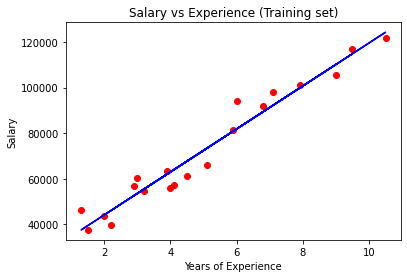

In [68]:
# Step 5 - Visualize training set results

# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line
plt.plot(X_train, regressor.predict(X_train), color='blue')

plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

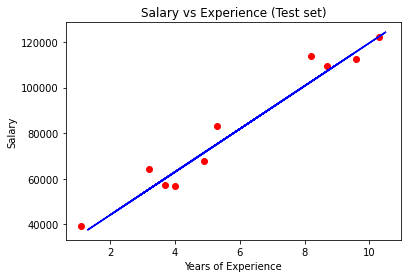

In [69]:
# Step 6 - Visualize test set results

# plot the actual data points of test set
plt.scatter(X_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [70]:
# Step 7 - Make new prediction
new_salary_pred = regressor.predict([[15]])
print('The predicted salary of a person with 15 years experience is ',new_salary_pred)

The predicted salary of a person with 15 years experience is  [166714.91691537]


In [71]:
regressor.score(X_train, y_train, sample_weight=None) # R^2 score

0.9549236946181227

### Normal Equation in Action


In [72]:
# Find Weight Function
def find_Weight(X, y):
  m = X.shape[0]  # Number of training examples.
  # Appending a cloumn of ones in X to add the bias term.
  # X is now a matrix with a column of ones appended to it for w0.
  X = np.append(X, np.ones((m, 1)), axis=1)
  # reshaping y to (m,1)
  y = y.reshape(m, 1)  # y is now a column vector.

  # The Normal Equation
  # np.linalg.pinv(X) is the pseudo-inverse of X.
  Weight = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))

  return Weight  # Weight is a column vector including ws.

In [73]:
# Predict Function
def predict(X):
  # Appending a cloumn of ones in X to add the bias term.
  X = np.append(X, np.ones((X.shape[0], 1)), axis=1)

  # preds is y_hat which is the dot product of X and weight.
  preds = np.dot(X, W_NE)

  return preds

In [74]:
# Plotting Predictions
# Getting the Value of weight using the find_weight function.
W_NE = find_Weight(X_train, y_train)
print('Estimated coefficients by Normal Equation:')
print(f'w_0 = {W_NE[1]}')
print(f'w_1 = {W_NE[0]}')

Estimated coefficients by Normal Equation:
w_0 = [25324.33537924]
w_1 = [9426.03876907]


In [75]:
# Getting the predictions on X using the predict function.
preds = predict(X_test)

In [76]:
W_NE[1][0] == w0_LR

False

In [77]:
import math
math.isclose(W_NE[1][0], w0_LR)

True

## 3. Statistical Method (LSE)


In [78]:
def estimate_coef(x, y):
  # number of observations/points
  n = len(x)

  # mean of x and y vector
  m_x = np.mean(x)
  m_y = np.mean(y)

  # calculating cross-deviation and deviation about x
  SS_xy = np.sum(np.dot((np.array(x)[:, 0]), y)) - (n * m_y * m_x)
  SS_xx = np.sum(np.multiply(x, x)) - (n * m_x * m_x)

  # calculating regression coefficients
  w_1 = SS_xy / SS_xx
  w_0 = m_y - w_1 * m_x

  return (w_0, w_1)

Estimated coefficients:
w_0 = 25324.33537924439
w_1 = 9426.038769074823
length: 20


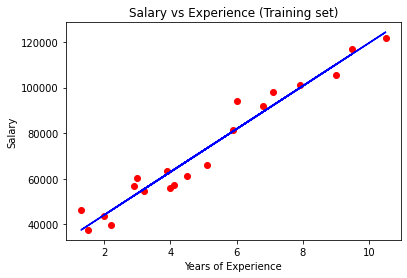

In [79]:
# estimating coefficients
W_Stat = estimate_coef(X_train, y_train)
print('Estimated coefficients:')
print(f'w_0 = {W_Stat[0]}')
print(f'w_1 = {W_Stat[1]}')
print('length:', len(X_train))

# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line
plt.plot(X_train, W_Stat[0] + W_Stat[1] * X_train, color='blue')

plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()